In [1]:
!pip install opencv-python matplotlib scikit-image


In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from google.colab import files
uploaded = files.upload()


Saving image1.jpeg to image1 (1).jpeg
Saving image2.jpeg to image2.jpeg


In [6]:
img1 = cv2.imread("image1.jpeg")
img2 = cv2.imread("image2.jpeg")


In [7]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

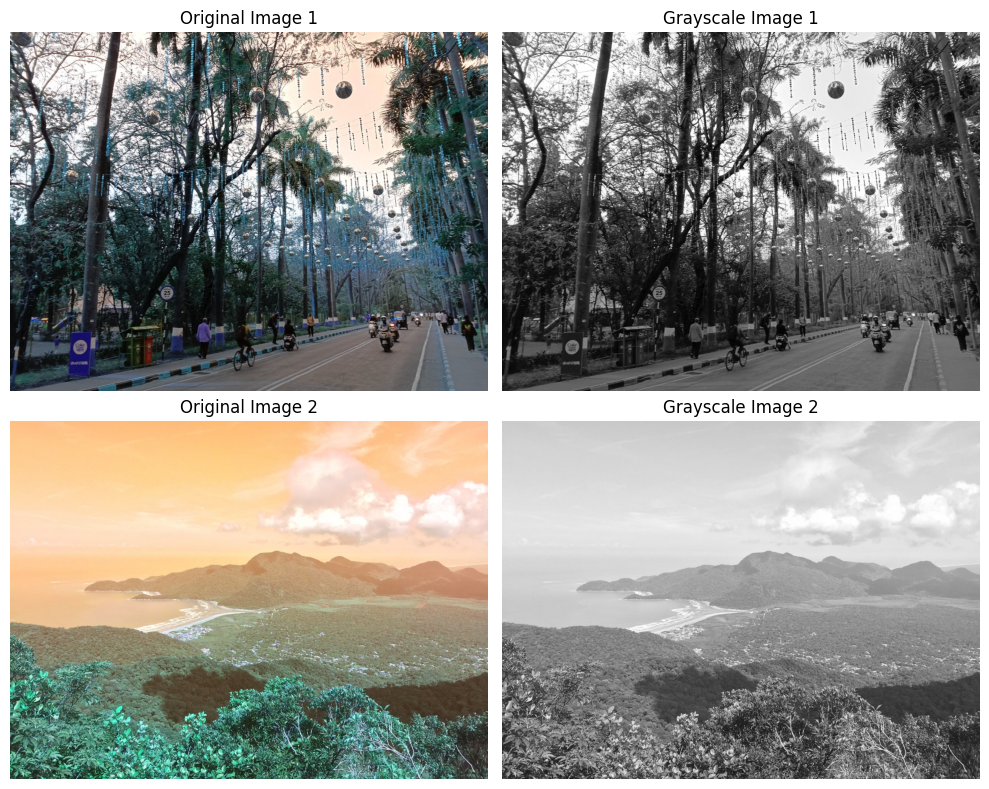

In [8]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title("Original Image 1")
plt.imshow(img1)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Grayscale Image 1")
plt.imshow(gray1, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Original Image 2")
plt.imshow(img2, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Grayscale Image 2")
plt.imshow(gray2, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

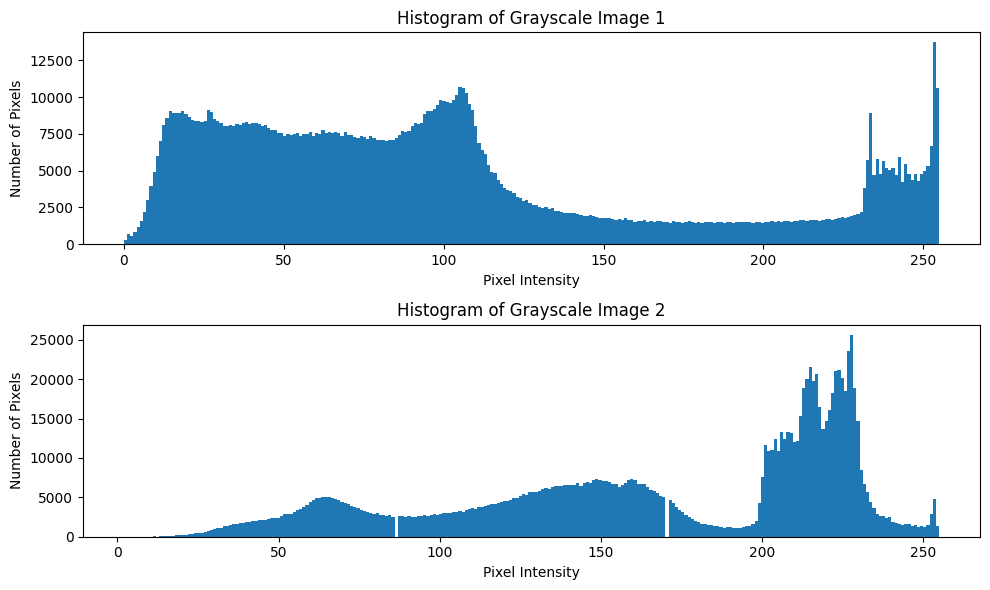

In [9]:
plt.figure(figsize=(10, 6))

# Histogram for grayscale image 1
plt.subplot(2, 1, 1)
plt.hist(gray1.ravel(), bins=256)
plt.title("Histogram of Grayscale Image 1")
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")

# Histogram for grayscale image 2
plt.subplot(2, 1, 2)
plt.hist(gray2.ravel(), bins=256)
plt.title("Histogram of Grayscale Image 2")
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")

plt.tight_layout()
plt.show()

In [10]:
# Define new size
new_size = (256, 256)

# Resize original images
img1_resized = cv2.resize(img1, new_size)
img2_resized = cv2.resize(img2, new_size)

# Resize grayscale images
gray1_resized = cv2.resize(gray1, new_size)
gray2_resized = cv2.resize(gray2, new_size)

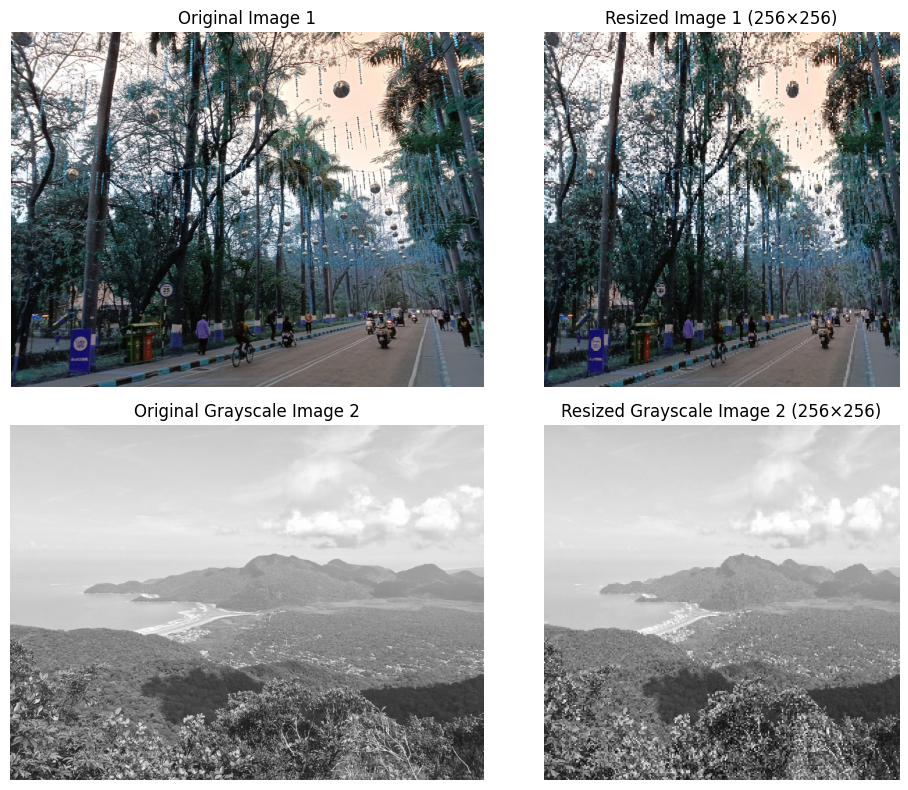

In [11]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title("Original Image 1")
plt.imshow(img1)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Resized Image 1 (256×256)")
plt.imshow(img1_resized)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Original Grayscale Image 2")
plt.imshow(gray2, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Resized Grayscale Image 2 (256×256)")
plt.imshow(gray2_resized, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

In [12]:
edges1 = cv2.Canny(gray1_resized, threshold1=100, threshold2=200)
edges2 = cv2.Canny(gray2_resized, threshold1=100, threshold2=200)

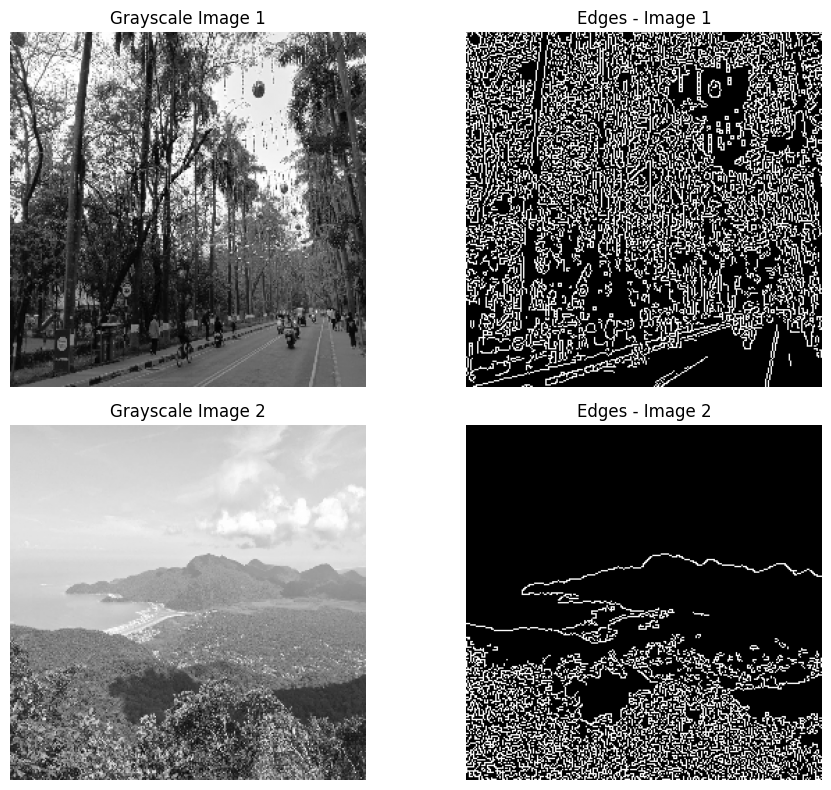

In [13]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title("Grayscale Image 1")
plt.imshow(gray1_resized, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Edges - Image 1")
plt.imshow(edges1, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Grayscale Image 2")
plt.imshow(gray2_resized, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Edges - Image 2")
plt.imshow(edges2, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

In [15]:
# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, std=20):
    noise = np.random.normal(mean, std, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

# Add noise
noisy1 = add_gaussian_noise(gray1_resized)
noisy2 = add_gaussian_noise(gray2_resized)

# Apply Gaussian Blur for noise removal
denoised1 = cv2.GaussianBlur(noisy1, (5, 5), 0)
denoised2 = cv2.GaussianBlur(noisy2, (5, 5), 0)

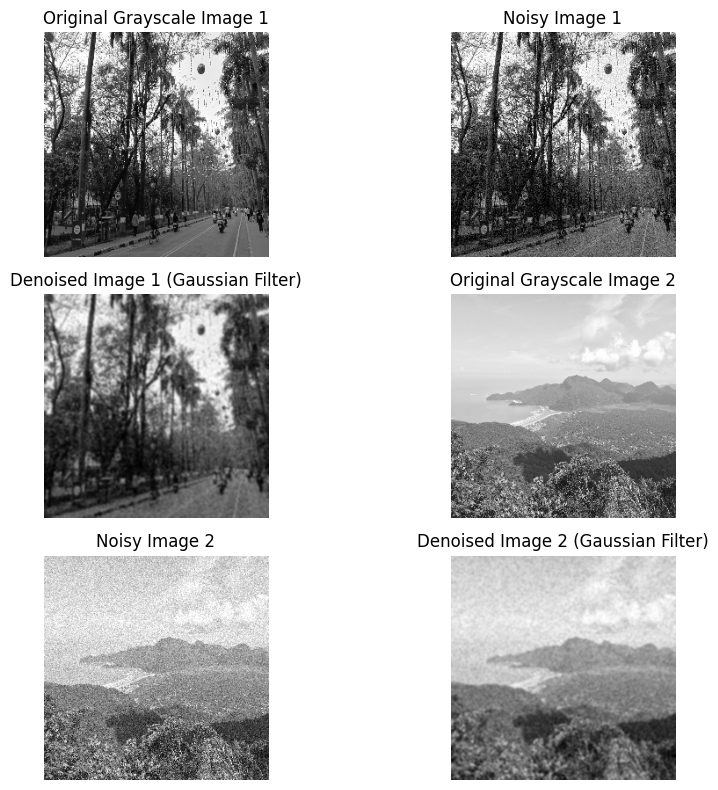

In [16]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.title("Original Grayscale Image 1")
plt.imshow(gray1_resized, cmap="gray")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.title("Noisy Image 1")
plt.imshow(noisy1, cmap="gray")
plt.axis("off")

plt.subplot(3, 2, 3)
plt.title("Denoised Image 1 (Gaussian Filter)")
plt.imshow(denoised1, cmap="gray")
plt.axis("off")

plt.subplot(3, 2, 4)
plt.title("Original Grayscale Image 2")
plt.imshow(gray2_resized, cmap="gray")
plt.axis("off")

plt.subplot(3, 2, 5)
plt.title("Noisy Image 2")
plt.imshow(noisy2, cmap="gray")
plt.axis("off")

plt.subplot(3, 2, 6)
plt.title("Denoised Image 2 (Gaussian Filter)")
plt.imshow(denoised2, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()